# Demonstration of TSNE, PCA and plotting decision sarfaces with multidimensional Data

In [13]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.datasets.base import load_iris
from sklearn.manifold.t_sne import TSNE
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.decomposition import PCA

In [14]:
# replace the below by your data and model
iris = load_iris()
X,y = iris.data, iris.target
pca = PCA(n_components=2).fit(X)
X_Train_embedded = pca.transform(X)
#X_Train_embedded = TSNE(n_components=2).fit_transform(X)
print X_Train_embedded.shape
model = LogisticRegression().fit(X,y)
y_predicted = model.predict(X)
# replace the above by your data and model

(150, 2)


In [15]:
# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

In [16]:
# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

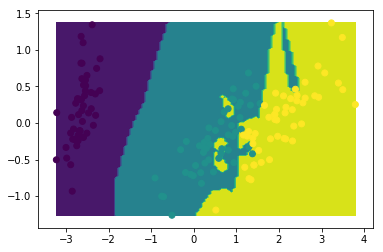

In [17]:
#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
plt.show()